In [3]:
# # Modify the API script to resample data to daily instead of hourly
# import requests
# import pandas as pd
# import datetime as dt

# # Define API details
# DMI_URL = 'https://dmigw.govcloud.dk/v2/metObs/collections/observation/items'
# api_key = '56642815-d535-418b-bda2-30a8a8ef4999'

# # Specify the desired start and end time
# start_time = pd.Timestamp(2002, 1, 1)
# end_time = pd.Timestamp(2023, 12, 31)
# datetime_str = start_time.tz_localize('UTC').isoformat() + '/' + end_time.tz_localize('UTC').isoformat()

# # Station ID
# stationIds = ['06102']

# # List of required parameters
# parameterIds = [
#     "temp_min_past1h", "temp_max_past1h", "temp_mean_past1h",
#     "temp_grass_mean_past1h", "temp_soil_min_past1h", "temp_soil_max_past1h", "temp_soil_mean_past1h",
#     "humidity_past1h", "pressure", "wind_dir_past1h", "wind_min_past1h",
#     "wind_gust_always_past1h", "wind_speed_past1h", "precip_past1h", "precip_dur_past1h",
#     "radia_glob_past1h", "sun_last1h_glob"
# ]

# # Fetch data for all parameters
# dfs = []
# for station in stationIds:
#     for parameter in parameterIds:
#         # Define API query parameters
#         params = {
#             'api-key': api_key,
#             'datetime': datetime_str,
#             'stationId': station,
#             'parameterId': parameter,
#             'limit': '300000',  # Max limit
#         }

#         # Send GET request
#         response = requests.get(DMI_URL, params=params)

#         # Check response status
#         if response.status_code == 200:
#             json_data = response.json()

#             # Extract data into DataFrame
#             if 'features' in json_data and json_data['features']:
#                 dfi = pd.json_normalize(json_data['features'])
#                 dfi['time'] = pd.to_datetime(dfi['properties.observed'])
#                 dfi = dfi[['time', 'properties.value', 'properties.stationId', 'properties.parameterId']]
#                 dfi.columns = [c.replace('properties.', '') for c in dfi.columns]
#                 dfi = dfi[~dfi.duplicated()]  # Remove duplicates
#                 dfi = dfi.set_index(['parameterId', 'stationId', 'time'])
#                 dfi = dfi['value'].unstack(['stationId', 'parameterId'])
#                 dfs.append(dfi)

# # Combine all data into a single DataFrame
# if dfs:
#     df = pd.concat(dfs, axis='columns').sort_index()

#     # Flatten MultiIndex by removing station ID level and keeping only parameter names
#     df.columns = df.columns.get_level_values(1)

#     # Define aggregation methods for daily resampling
#     aggregation_methods = {
#         "temp_min_past1h": "min",  # Minimum temperature of the day
#         "temp_max_past1h": "max",  # Maximum temperature of the day
#         "temp_mean_past1h": "mean",  # Daily mean temperature
#         "temp_grass_mean_past1h": "mean",  # Mean grass temperature
#         "temp_soil_min_past1h": "min",  # Minimum soil temperature
#         "temp_soil_max_past1h": "max",  # Maximum soil temperature
#         "temp_soil_mean_past1h": "mean",  # Mean soil temperature
#         "humidity_past1h": "mean",  # Average humidity of the day
#         "pressure": "mean",  # Mean atmospheric pressure
#         "wind_dir_past1h": "mean",  # Average wind direction
#         "wind_min_past1h": "min",  # Minimum wind speed
#         "wind_gust_always_past1h": "max",  # Maximum wind gust
#         "wind_speed_past1h": "mean",  # Mean wind speed
#         "precip_past1h": "sum",  # Total daily precipitation
#         "precip_dur_past1h": "sum",  # Total minutes of precipitation
#         "radia_glob_past1h": "sum",  # Total daily global radiation
#         "sun_last1h_glob": "sum",  # Total sunshine duration per day
#     }

#     # Resample the DataFrame to daily using defined aggregation rules
#     df_daily = df.resample("D").agg(aggregation_methods)

#     # Save as daily CSV
#     df_daily.to_csv("dmi_weather_data_daily.csv")


#     # Save as hourly CSV
#     df.to_csv("dmi_weather_data_hourly.csv")

# else:
#     print("No data retrieved. Check API response and station/parameter configuration.")

df_daily = pd.read_csv("../Data loading and handling/Cleaned data etc./dmi_weather_data_daily.csv", header=0, parse_dates=["time"], index_col="time")

In [4]:
df_daily.tail() # Show first rows

,temp_min_past1h,temp_max_past1h,temp_mean_past1h,temp_grass_mean_past1h,temp_soil_min_past1h,temp_soil_max_past1h,temp_soil_mean_past1h,humidity_past1h,pressure,wind_dir_past1h,wind_min_past1h,wind_gust_always_past1h,wind_speed_past1h,precip_past1h,precip_dur_past1h,radia_glob_past1h,sun_last1h_glob
time,,,,,,,,,,,,,,,,,
2023-12-20 00:00:00+00:00,0.8,4.4,3.141667,2.316667,5.1,5.4,5.241667,88.583333,995.043373,252.000000,NaN,12.2,2.541667,0.4,4.0,349.0,111.0
2023-12-21 00:00:00+00:00,1.4,8.7,5.316667,4.637500,5.0,5.3,5.141667,86.083333,975.337324,254.666667,0.7,22.5,5.329167,19.9,159.0,270.0,29.5
2023-12-22 00:00:00+00:00,0.1,4.0,2.395833,1.129167,4.0,5.1,4.533333,66.000000,983.997222,293.416667,0.0,19.1,5.020833,0.6,3.0,749.0,294.5
2023-12-23 00:00:00+00:00,-1.6,3.3,0.833333,-0.250000,3.6,4.1,3.754167,88.000000,993.885417,264.000000,NaN,10.5,2.379167,0.8,4.0,589.0,247.0
2023-12-24 00:00:00+00:00,-0.3,2.1,1.120000,0.700000,3.4,3.6,3.520000,97.700000,992.207273,136.500000,NaN,6.6,1.500000,5.0,38.0,9.0,0.0


In [5]:
# Check for missing values
missing_values = df_daily.isnull().sum()
print("Missing Data Count:\n", missing_values[missing_values > 0])

Missing Data Count:
 temp_min_past1h             150
temp_max_past1h             150
temp_mean_past1h            150
temp_grass_mean_past1h      138
temp_soil_min_past1h        138
temp_soil_max_past1h        138
temp_soil_mean_past1h       138
humidity_past1h             160
pressure                   5931
wind_dir_past1h             143
wind_min_past1h            6245
wind_gust_always_past1h     758
wind_speed_past1h           143
dtype: int64


In [6]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Assume df_daily is your DataFrame with a 'pressure' column (in hPa)
# # If you haven't loaded it yet, you can load it with:
# # df_daily = pd.read_csv("dmi_weather_data_daily.csv", parse_dates=['time'], index_col='time')

# # --- 1. Descriptive Statistics ---
# print("Pressure Descriptive Statistics:")
# print(df_daily['pressure'].describe())

# # Calculate the coefficient of variation (CV) if needed.
# cv = df_daily['pressure'].std() / df_daily['pressure'].mean()
# print(f"Coefficient of Variation: {cv:.2f}")

# # --- 2. Time Series Plot ---
# plt.figure(figsize=(12, 6))
# plt.plot(df_daily.index, df_daily['pressure'], marker='o', linestyle='-', label='Pressure (hPa)')
# plt.xlabel("Date")
# plt.ylabel("Pressure (hPa)")
# plt.title("Daily Pressure Data Over Time")
# plt.legend()
# plt.show()

# # --- 3. Histogram ---
# plt.figure(figsize=(12, 6))
# plt.hist(df_daily['pressure'].dropna(), bins=30, edgecolor='k', alpha=0.7)
# plt.xlabel("Pressure (hPa)")
# plt.ylabel("Frequency")
# plt.title("Histogram of Pressure Data")
# plt.show()

# # --- 4. Boxplot ---
# plt.figure(figsize=(6, 8))
# plt.boxplot(df_daily['pressure'].dropna(), vert=True, patch_artist=True)
# plt.ylabel("Pressure (hPa)")
# plt.title("Boxplot of Pressure Data")
# plt.show()

# # --- 5. Rolling Standard Deviation ---
# # Calculate a 30-day rolling standard deviation to assess variability over time.
# rolling_std = df_daily['pressure'].rolling(window=30).std()

# plt.figure(figsize=(12, 6))
# plt.plot(df_daily.index, rolling_std, label="30-day Rolling Std (hPa)")
# plt.xlabel("Date")
# plt.ylabel("Standard Deviation (hPa)")
# plt.title("Rolling Standard Deviation of Pressure Data")
# plt.legend()
# plt.show()

In [7]:
df_daily.count()

temp_min_past1h            7878
temp_max_past1h            7878
temp_mean_past1h           7878
temp_grass_mean_past1h     7890
temp_soil_min_past1h       7890
temp_soil_max_past1h       7890
temp_soil_mean_past1h      7890
humidity_past1h            7868
pressure                   2097
wind_dir_past1h            7885
wind_min_past1h            1783
wind_gust_always_past1h    7270
wind_speed_past1h          7885
precip_past1h              8028
precip_dur_past1h          8028
radia_glob_past1h          8028
sun_last1h_glob            8028
dtype: int64

In [8]:
# Define threshold for missing data (e.g., remove columns with >50% missing)
missing_threshold = 0.50  # 50%

# Calculate missing data percentage
missing_percent = df_daily.isnull().mean()

# Remove columns with too much missing data
columns_to_drop = missing_percent[missing_percent > missing_threshold].index
df_cleaned = df_daily.drop(columns=columns_to_drop)

print(f"Removed columns due to excessive missing data: {list(columns_to_drop)}")

Removed columns due to excessive missing data: ['pressure', 'wind_min_past1h']


In [9]:
df_cleaned.head() # Show first rows

,temp_min_past1h,temp_max_past1h,temp_mean_past1h,temp_grass_mean_past1h,temp_soil_min_past1h,temp_soil_max_past1h,temp_soil_mean_past1h,humidity_past1h,wind_dir_past1h,wind_gust_always_past1h,wind_speed_past1h,precip_past1h,precip_dur_past1h,radia_glob_past1h,sun_last1h_glob
time,,,,,,,,,,,,,,,
2002-01-01 00:00:00+00:00,-9.3,6.4,1.250000,-0.062500,-0.2,0.1,0.037500,88.708333,281.666667,NaN,6.995833,2.2,34.0,271.0,0.0
2002-01-02 00:00:00+00:00,-6.3,6.4,-0.837500,-1.970833,-0.1,0.0,-0.033333,77.583333,110.208333,NaN,2.695833,0.0,0.0,805.0,328.0
2002-01-03 00:00:00+00:00,-7.6,-1.0,-5.166667,-6.937500,-0.2,0.0,-0.100000,87.458333,158.625000,NaN,1.195833,0.0,0.0,739.0,278.5
2002-01-04 00:00:00+00:00,-9.3,-1.3,-6.025000,-7.950000,-0.7,-0.2,-0.333333,80.916667,221.708333,NaN,0.987500,0.0,0.0,876.0,355.0
2002-01-05 00:00:00+00:00,-10.6,3.7,-3.466667,-4.337500,-1.1,-0.4,-0.754167,92.458333,239.750000,NaN,1.854167,0.1,1.0,659.0,268.5


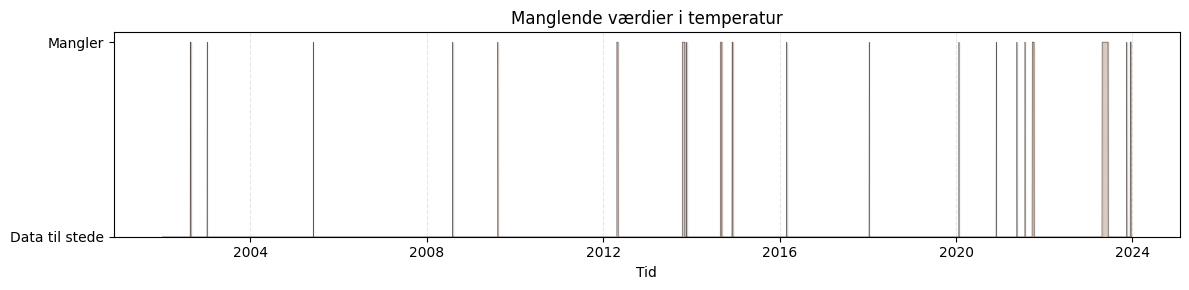

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Sørg for at 'temp_mean_daily' findes
assert 'temp_mean_past1h' in df_cleaned.columns

# Udtræk kun kolonnen og lav en NaN-mask
mask = df_cleaned['temp_mean_past1h'].isna()

# Plot
plt.figure(figsize=(12, 3))
plt.plot(df_cleaned.index, mask, color='black', linewidth=0.2)
plt.fill_between(df_cleaned.index, 0, 1, where=mask, color='#9F7E69', alpha=0.4, step='mid')

plt.ylim(0, 1.05)
plt.yticks([0, 1], ['Data til stede', 'Mangler'])
plt.title("Manglende værdier i temperatur")
plt.xlabel("Tid")
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Missing values before processing:
temp_min_past1h            150
temp_max_past1h            150
temp_mean_past1h           150
temp_grass_mean_past1h     138
temp_soil_min_past1h       138
temp_soil_max_past1h       138
temp_soil_mean_past1h      138
humidity_past1h            160
wind_dir_past1h            143
wind_gust_always_past1h    758
wind_speed_past1h          143
dtype: int64



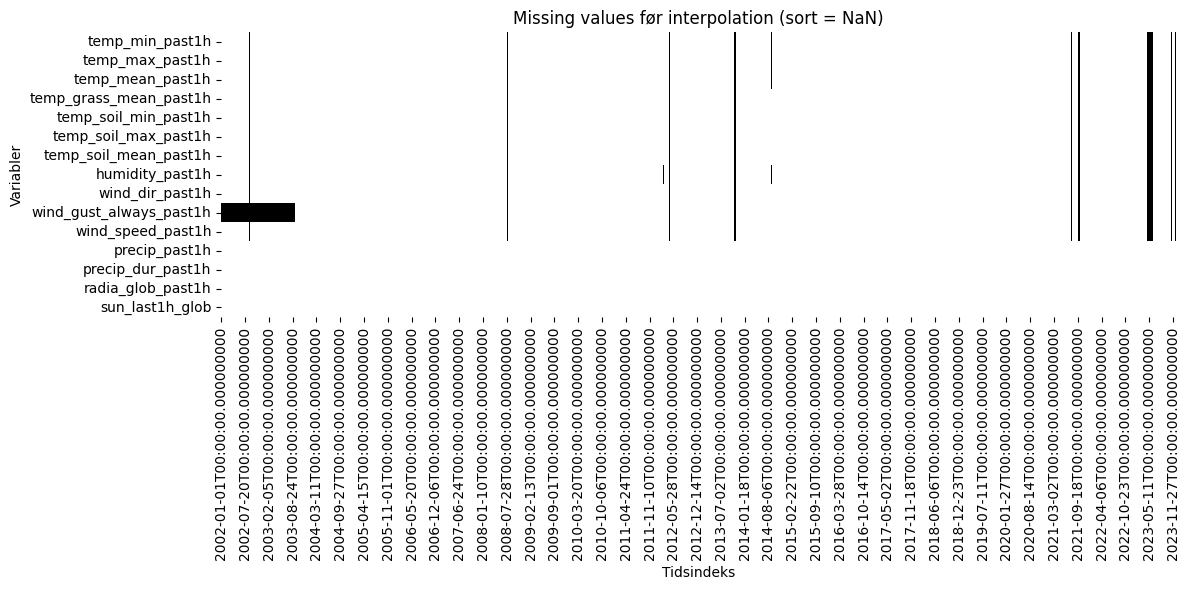

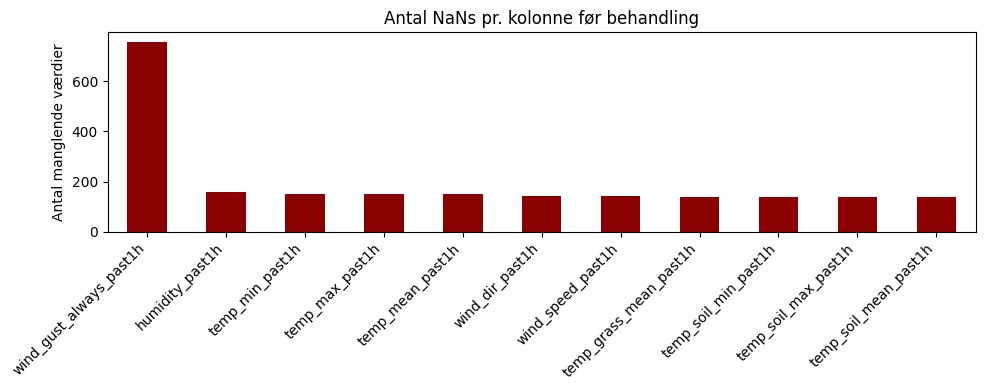

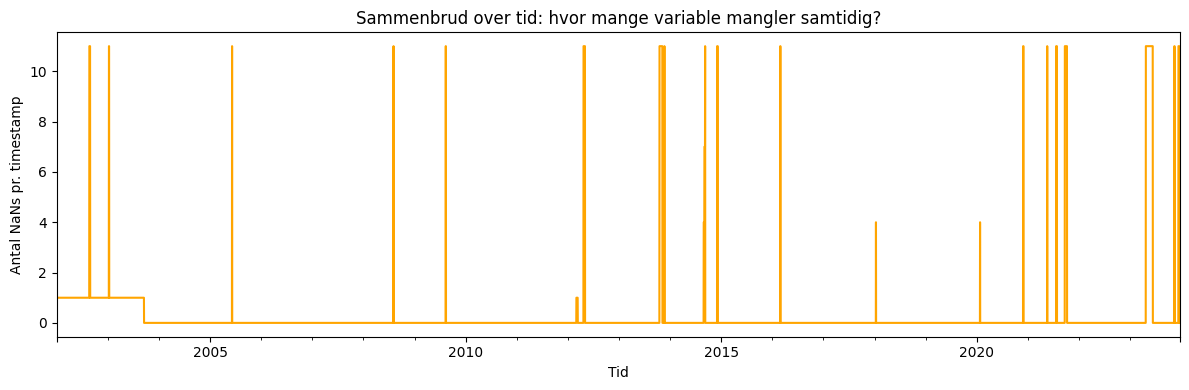

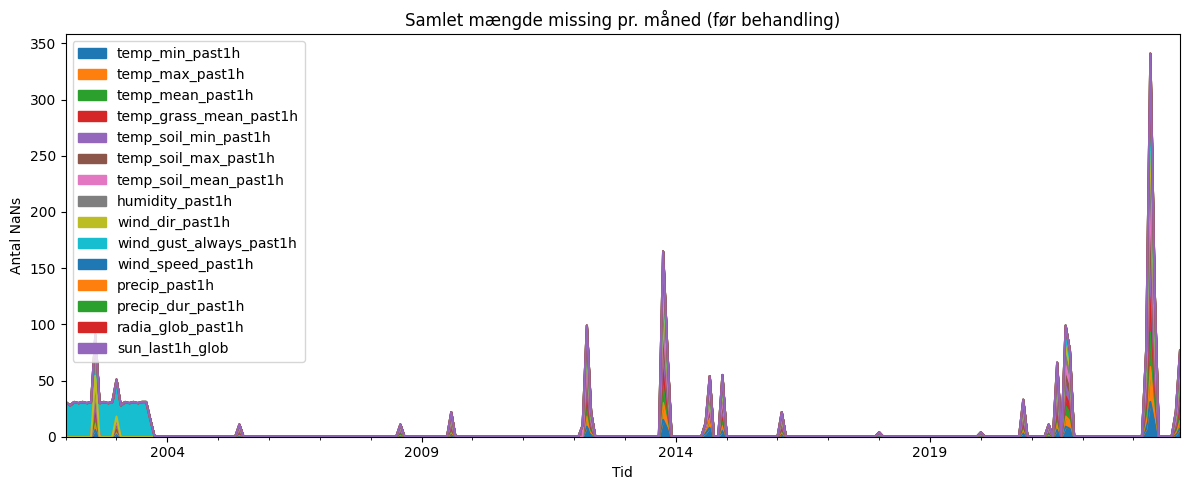

Missing values after processing:
Series([], dtype: int64)

✅ Data cleaning complete!


,temp_min_past1h,temp_max_past1h,temp_mean_past1h,temp_grass_mean_past1h,temp_soil_min_past1h,temp_soil_max_past1h,temp_soil_mean_past1h,humidity_past1h,wind_dir_past1h,wind_gust_always_past1h,wind_speed_past1h,precip_past1h,precip_dur_past1h,radia_glob_past1h,sun_last1h_glob
time,,,,,,,,,,,,,,,
2002-01-01 00:00:00+00:00,-9.3,6.4,1.250000,-0.062500,-0.2,0.1,0.037500,88.708333,281.666667,10.880,6.995833,2.2,34.0,271.0,0.0
2002-01-02 00:00:00+00:00,-6.3,6.4,-0.837500,-1.970833,-0.1,0.0,-0.033333,77.583333,110.208333,10.995,2.695833,0.0,0.0,805.0,328.0
2002-01-03 00:00:00+00:00,-7.6,-1.0,-5.166667,-6.937500,-0.2,0.0,-0.100000,87.458333,158.625000,12.765,1.195833,0.0,0.0,739.0,278.5
2002-01-04 00:00:00+00:00,-9.3,-1.3,-6.025000,-7.950000,-0.7,-0.2,-0.333333,80.916667,221.708333,13.415,0.987500,0.0,0.0,876.0,355.0
2002-01-05 00:00:00+00:00,-10.6,3.7,-3.466667,-4.337500,-1.1,-0.4,-0.754167,92.458333,239.750000,11.115,1.854167,0.1,1.0,659.0,268.5


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# ANTAGER at du allerede har
# df_cleaned = pd.read_csv(..., parse_dates=[...], index_col=...)
# -----------------------------

# Step 1: Identify missing values before processing
missing_before = df_cleaned.isnull().sum()
print(f"Missing values before processing:\n{missing_before[missing_before > 0]}\n")

# ========== VISUALISERING AF MISSING DATA ==========
# 1. Heatmap: Missing pr. feature over tid
plt.figure(figsize=(12, 6))
sns.heatmap(df_cleaned.isna().T, cbar=False, cmap='gray_r', xticklabels=200)
plt.xlabel("Tidsindeks")
plt.ylabel("Variabler")
plt.title("Missing values før interpolation (sort = NaN)")
plt.tight_layout()
plt.show()

# 2. Barplot: Antal missing pr. kolonne
missing_count = missing_before[missing_before > 0].sort_values(ascending=False)
missing_count.plot(kind='bar', figsize=(10, 4), color='darkred')
plt.ylabel("Antal manglende værdier")
plt.title("Antal NaNs pr. kolonne før behandling")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Missing over tid: hvor mange NaNs pr. timestamp?
na_over_time = df_cleaned.isna().sum(axis=1)
plt.figure(figsize=(12, 4))
na_over_time.plot(color='orange')
plt.ylabel("Antal NaNs pr. timestamp")
plt.xlabel("Tid")
plt.title("Sammenbrud over tid: hvor mange variable mangler samtidig?")
plt.tight_layout()
plt.show()

# 4. (Valgfri) Missing samlet pr. måned
df_cleaned.isna().resample('M').sum().plot(kind='area', stacked=True, figsize=(12, 5))
plt.title("Samlet mængde missing pr. måned (før behandling)")
plt.ylabel("Antal NaNs")
plt.xlabel("Tid")
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# Step 2: Apply linear interpolation for gaps up to 12 hours
df_cleaned = df_cleaned.interpolate(method='linear', limit=12, limit_direction='both')

# Step 3: Add helper columns for seasonal mean imputation
df_cleaned["hour"] = df_cleaned.index.hour
df_cleaned["dayofyear"] = df_cleaned.index.dayofyear
df_cleaned["month"] = df_cleaned.index.month
df_cleaned["day"] = df_cleaned.index.day
df_cleaned["year"] = df_cleaned.index.year  # Keep track of leap years

# Step 5: Fill remaining missing values using seasonal means
df_cleaned = df_cleaned.groupby(["month", "day", "hour"]).transform(lambda x: x.fillna(x.mean()))

# Step 6: Remove helper columns
df_cleaned.drop(columns=["hour", "dayofyear", "month", "day", "year"], errors="ignore", inplace=True)

# Step 7: Save the cleaned dataset to a new CSV file
df_cleaned.to_csv("dmi_weather_data_cleaned.csv")

# Step 8: Identify missing values after processing
missing_after = df_cleaned.isnull().sum()
print(f"Missing values after processing:\n{missing_after[missing_after > 0]}")
print("\n✅ Data cleaning complete!")

# Inspect first rows
df_cleaned.head()

In [12]:
import pandas as pd

# # Load cleaned weather data
# file_path = "Cleaned data etc./dmi_weather_data_cleaned.csv"
# df = pd.read_csv(file_path, header=0, parse_dates=["time"], index_col="time")

# Ensure `time` is datetime and remove any timezone info
df_cleaned.index = pd.to_datetime(df_cleaned.index).tz_localize(None)

# Load inflow data (KarupBro)
file_path_korup_parken = 'Raw data/Bygholm_Kørup_Parken_VNF_døgn_1975-2023.csv'
korup_parken_df = pd.read_csv(file_path_korup_parken, decimal=",", encoding="ISO-8859-1", delimiter=";")

# Clean column names
korup_parken_df.columns = korup_parken_df.columns.str.strip()
korup_parken_df.columns = ["timestamp", "KarupBro", "BygholmPark"]

# Convert timestamp to datetime (ensure it's properly formatted)
korup_parken_df["timestamp"] = pd.to_datetime(korup_parken_df["timestamp"], format="%d-%m-%Y")

# Set timestamp as index to match `df`
korup_parken_df.set_index("timestamp", inplace=True)

# Drop unnecessary column
korup_parken_df.drop(columns=["BygholmPark"], inplace=True)

# Merge data on the index instead of the column
merged_df = df_cleaned.join(korup_parken_df, how="left")

# Check result
merged_df.tail()

,temp_min_past1h,temp_max_past1h,temp_mean_past1h,temp_grass_mean_past1h,temp_soil_min_past1h,temp_soil_max_past1h,temp_soil_mean_past1h,humidity_past1h,wind_dir_past1h,wind_gust_always_past1h,wind_speed_past1h,precip_past1h,precip_dur_past1h,radia_glob_past1h,sun_last1h_glob,KarupBro
time,,,,,,,,,,,,,,,,
2023-12-20,0.8,4.4,3.141667,2.316667,5.1,5.4,5.241667,88.583333,252.000000,12.2,2.541667,0.4,4.0,349.0,111.0,4448.18
2023-12-21,1.4,8.7,5.316667,4.637500,5.0,5.3,5.141667,86.083333,254.666667,22.5,5.329167,19.9,159.0,270.0,29.5,5602.14
2023-12-22,0.1,4.0,2.395833,1.129167,4.0,5.1,4.533333,66.000000,293.416667,19.1,5.020833,0.6,3.0,749.0,294.5,6636.60
2023-12-23,-1.6,3.3,0.833333,-0.250000,3.6,4.1,3.754167,88.000000,264.000000,10.5,2.379167,0.8,4.0,589.0,247.0,5809.15
2023-12-24,-0.3,2.1,1.120000,0.700000,3.4,3.6,3.520000,97.700000,136.500000,6.6,1.500000,5.0,38.0,9.0,0.0,5197.78


In [13]:
merged_df.rename(columns={
    'temp_min_past1h': 'temp_min_daily',
    'temp_max_past1h': 'temp_max_daily',
    'temp_mean_past1h': 'temp_mean_daily',
    'temp_grass_mean_past1h': 'temp_grass_mean_daily',
    'temp_soil_min_past1h': 'temp_soil_min_daily',
    'temp_soil_max_past1h': 'temp_soil_max_daily',
    'temp_soil_mean_past1h': 'temp_soil_mean_daily',
    'humidity_past1h': 'humidity_daily',
    'wind_dir_past1h': 'wind_direction_daily',
    'wind_speed_past1h': 'wind_speed_daily',
    'wind_gust_always_past1h': 'wind_gust_max_daily',
    'precip_past1h': 'precip_total_daily',
    'precip_dur_past1h': 'precip_duration_daily',
    'radia_glob_past1h': 'radiation_global_daily',
    'sun_last1h_glob': 'sunshine_duration_daily',
    'KarupBro': 'KarupBro',  # Assuming this is a station or location name
}, inplace=True)

# Check for missing values
merged_df.isnull().sum()

temp_min_daily             0
temp_max_daily             0
temp_mean_daily            0
temp_grass_mean_daily      0
temp_soil_min_daily        0
temp_soil_max_daily        0
temp_soil_mean_daily       0
humidity_daily             0
wind_direction_daily       0
wind_gust_max_daily        0
wind_speed_daily           0
precip_total_daily         0
precip_duration_daily      0
radiation_global_daily     0
sunshine_duration_daily    0
KarupBro                   0
dtype: int64

In [ ]:
# import pandas as pd
# import numpy as np

# # --- Step 1: Calculate Saturation Vapor Pressure (es) ---
# # Using the temperatures (in °C) to compute es for both max and min.
# merged_df['es_max'] = 0.6108 * np.exp((17.27 * merged_df['temp_max_daily']) / (merged_df['temp_max_daily'] + 237.3))
# merged_df['es_min'] = 0.6108 * np.exp((17.27 * merged_df['temp_min_daily']) / (merged_df['temp_min_daily'] + 237.3))
# merged_df['es'] = (merged_df['es_max'] + merged_df['es_min']) / 2

# # --- Step 2: Calculate Actual Vapor Pressure (ea) ---
# # Assuming relative humidity is given in percentage.
# merged_df['ea'] = (merged_df['humidity_daily'] / 100.0) * merged_df['es']

# # --- Step 3: Calculate the Slope of the Saturation Vapor Pressure Curve (delta) ---
# # Using the daily mean temperature (°C)
# T = merged_df['temp_mean_daily']
# merged_df['delta'] = (4098 * (0.6108 * np.exp((17.27 * T) / (T + 237.3)))) / ((T + 237.3) ** 2)

# # --- Step 4: Calculate the Psychrometric Constant (gamma) ---
# # Convert pressure from hPa to kPa by dividing by 10.
# merged_df['gamma'] = 0.000665 * (1010.6 / 10)

# # --- Step 5: Convert Wind Speed from 10 m to 2 m ---
# # Using the logarithmic wind profile conversion factor.
# # Conversion factor: u2 = u10 * (4.87 / ln(67.8*10 - 5.42))
# conversion_factor = 4.87 / np.log(67.8 * 10 - 5.42)
# merged_df['u2'] = merged_df['wind_speed_daily'] * conversion_factor

# # --- Step 6: Estimate Net Radiation (Rn) ---
# # Using the daily global radiation (in MJ/m²/day) and an albedo of 0.23 for a reference grass surface.
# merged_df['Rns'] = (1 - 0.23) * merged_df['radiation_global_daily']
# # For simplicity, we assume the net longwave radiation is negligible,
# # so we set net radiation Rn approximately equal to Rns.
# merged_df['Rn'] = merged_df['Rns']

# # --- Step 7: Assume Soil Heat Flux (G) is Zero ---
# # For daily time steps, soil heat flux is often negligible.
# merged_df['G'] = 0

# # --- Step 8: Calculate ET0 using the FAO Penman–Monteith Equation ---
# # ET0 (mm/day) is calculated as:
# # ET0 = [0.408*delta*(Rn - G) + gamma*(900/(T+273))*u2*(es - ea)] / [delta + gamma*(1+0.34*u2)]
# merged_df['ET0'] = (
#     (0.408 * merged_df['delta'] * (merged_df['Rn'] - merged_df['G']) +
#      merged_df['gamma'] * (900 / (T + 273)) * merged_df['u2'] * (merged_df['es'] - merged_df['ea']))
#     /
#     (merged_df['delta'] + merged_df['gamma'] * (1 + 0.34 * merged_df['u2']))
# )

# # List the temporary columns to remove
# temp_columns = ['es_max', 'es_min', 'es', 'ea', 'delta', 'gamma', 'u2', 'Rns', 'Rn', 'G']

# # Remove the temporary columns that exist in merged_df, keeping the other variables (including ET0)
# merged_df = merged_df.drop(columns=[col for col in temp_columns if col in merged_df.columns])

# merged_df.to_csv("data_cleaned_and_interpolated_ET0.csv")

# # Optionally, display the first few rows to verify that only the desired columns remain
# merged_df.head()

,temp_min_daily,temp_max_daily,temp_mean_daily,temp_grass_mean_daily,temp_soil_min_daily,temp_soil_max_daily,temp_soil_mean_daily,humidity_daily,wind_direction_daily,wind_gust_max_daily,wind_speed_daily,precip_total_daily,precip_duration_daily,radiation_global_daily,sunshine_duration_daily,KarupBro,ET0
time,,,,,,,,,,,,,,,,,
2002-01-01,-9.3,6.4,1.250000,-0.062500,-0.2,0.1,0.037500,88.708333,281.666667,10.880,6.995833,2.2,34.0,271.0,0.0,1829.75,17.801203
2002-01-02,-6.3,6.4,-0.837500,-1.970833,-0.1,0.0,-0.033333,77.583333,110.208333,10.995,2.695833,0.0,0.0,805.0,328.0,7279.46,68.969026
2002-01-03,-7.6,-1.0,-5.166667,-6.937500,-0.2,0.0,-0.100000,87.458333,158.625000,12.765,1.195833,0.0,0.0,739.0,278.5,5261.85,61.660887
2002-01-04,-9.3,-1.3,-6.025000,-7.950000,-0.7,-0.2,-0.333333,80.916667,221.708333,13.415,0.987500,0.0,0.0,876.0,355.0,2951.97,72.208452
2002-01-05,-10.6,3.7,-3.466667,-4.337500,-1.1,-0.4,-0.754167,92.458333,239.750000,11.115,1.854167,0.1,1.0,659.0,268.5,1868.53,54.709877


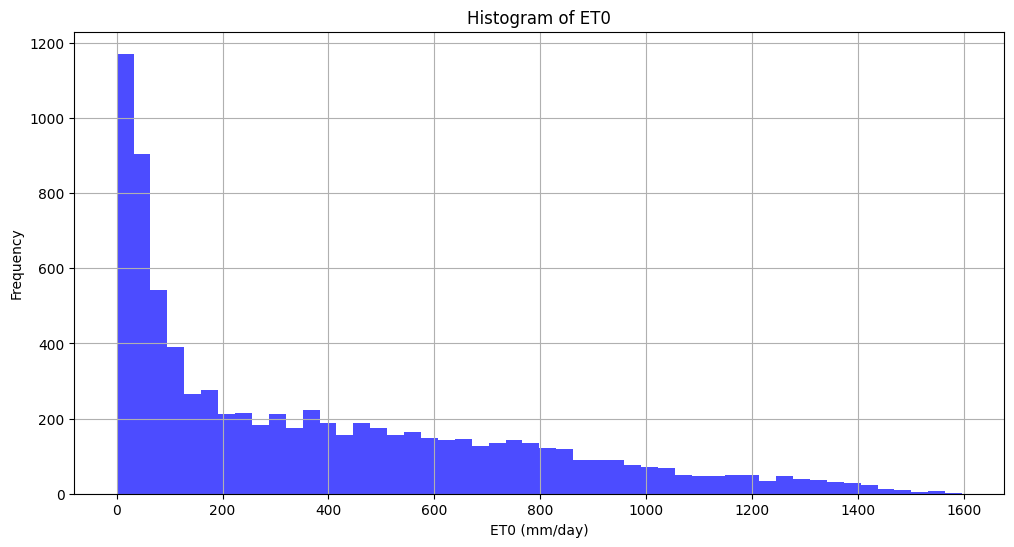

In [ ]:
# histogram = merged_df['ET0'].hist(bins=50, figsize=(12, 6), color='blue', alpha=0.7)
# histogram.set_title('Histogram of ET0')
# histogram.set_xlabel('ET0 (mm/day)')
# histogram.set_ylabel('Frequency')
# plt.show()

## Check for outliers etc.

<Figure size 1200x1200 with 0 Axes>

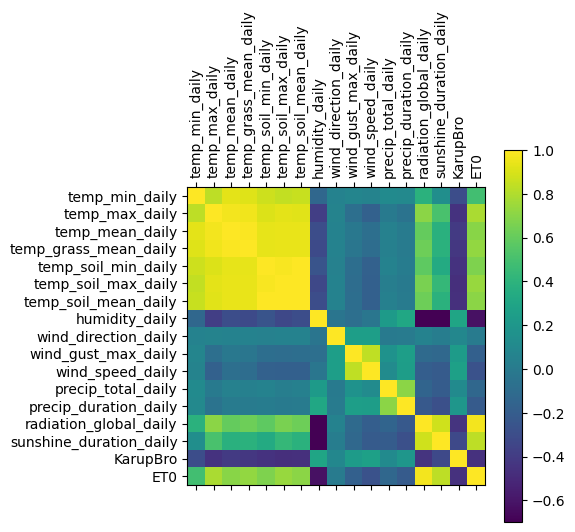

In [15]:
import matplotlib.pyplot as plt

# Correlation matrix
corr = merged_df.corr()
plt.figure(figsize=(12, 12))
plt.matshow(corr, fignum=2)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()

Korrelation med KarupBro, sorteret efter styrke:
temp_soil_max_daily       -0.466960
temp_soil_mean_daily      -0.460838
ET0                       -0.454678
temp_max_daily            -0.451364
temp_soil_min_daily       -0.451214
radiation_global_daily    -0.446327
temp_grass_mean_daily     -0.421116
temp_mean_daily           -0.411234
sunshine_duration_daily   -0.324220
humidity_daily             0.300978
temp_min_daily            -0.300273
wind_speed_daily           0.265363
wind_gust_max_daily        0.231533
precip_duration_daily      0.190374
precip_total_daily         0.114508
wind_direction_daily       0.085543
Name: KarupBro, dtype: float64


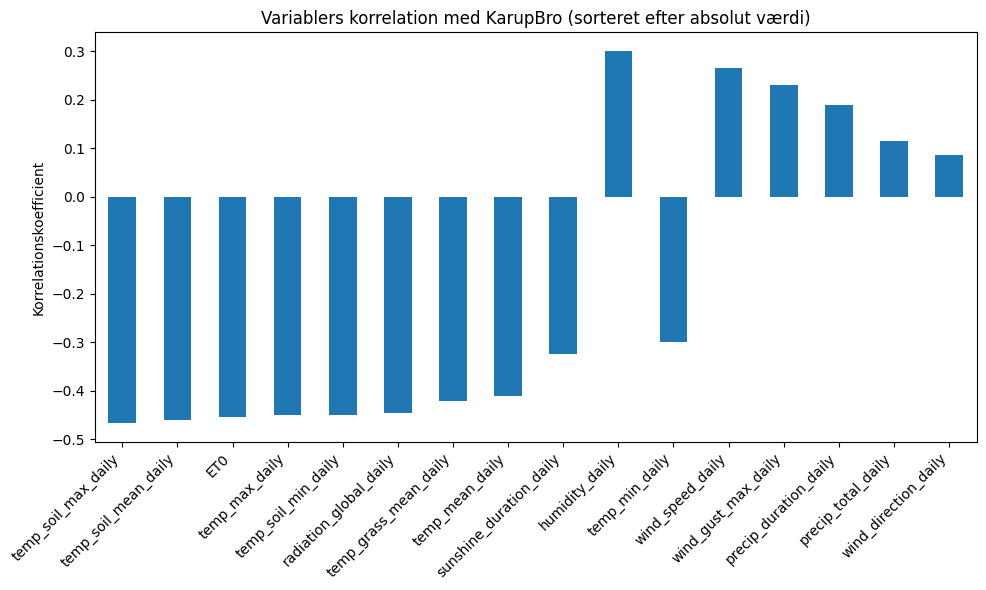

In [20]:
import matplotlib.pyplot as plt

# 1) Beregn hele korrelationsmatricen
corr = merged_df.corr()

# 2) Træk kun 'KarupBro' ud (fjern sig selv) og sorter efter absolut styrke
corr_with_karup = corr['KarupBro'].drop('KarupBro')
# sortér efter absolut værdi, men behold fortegn
corr_sorted = corr_with_karup.reindex(corr_with_karup.abs().sort_values(ascending=False).index)

# 3) Print de største korrelationer
print("Korrelation med KarupBro, sorteret efter styrke:")
print(corr_sorted)

# 4) Plot som bar chart
fig, ax = plt.subplots(figsize=(10, 6))
corr_sorted.plot(kind='bar', ax=ax)
ax.set_ylabel('Korrelationskoefficient')
ax.set_title('Variablers korrelation med KarupBro (sorteret efter absolut værdi)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Forklaret variansandel pr. PC:
PC1     0.509656
PC2     0.169185
PC3     0.118129
PC4     0.075865
PC5     0.053576
PC6     0.021081
PC7     0.016812
PC8     0.012450
PC9     0.008826
PC10    0.006961
PC11    0.004612
PC12    0.001183
PC13    0.000794
PC14    0.000573
PC15    0.000285
PC16    0.000012
dtype: float64


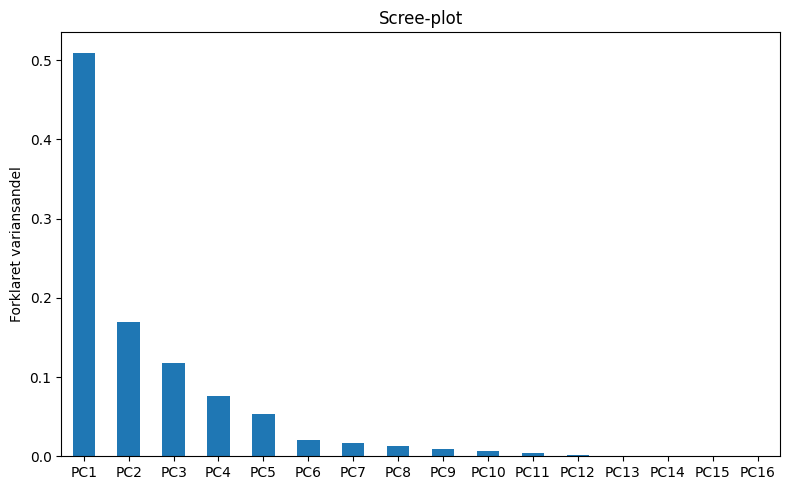


Loadings (bidrag til PC’erne):
                              PC1       PC2       PC3       PC4       PC5  \
temp_min_daily           0.285982  0.267963 -0.064189 -0.195424 -0.110181   
temp_max_daily           0.338774  0.056807 -0.028614 -0.032144  0.007564   
temp_mean_daily          0.332089  0.147022 -0.045663 -0.101405 -0.052313   
temp_grass_mean_daily    0.334415  0.135121 -0.042048 -0.088441 -0.047582   
temp_soil_min_daily      0.326766  0.136621 -0.111447 -0.096210  0.007061   
temp_soil_max_daily      0.336916  0.095536 -0.074730 -0.053413  0.015430   
temp_soil_mean_daily     0.333183  0.116271 -0.092569 -0.075281  0.010729   
humidity_daily          -0.168981  0.284770 -0.381433 -0.175891  0.135817   
wind_direction_daily     0.017947  0.105776  0.320645 -0.238976  0.904278   
wind_gust_max_daily     -0.038028  0.308268  0.556572 -0.064466 -0.229733   
wind_speed_daily        -0.067844  0.309266  0.542070 -0.128542 -0.241447   
precip_total_daily      -0.014120  0.383165 

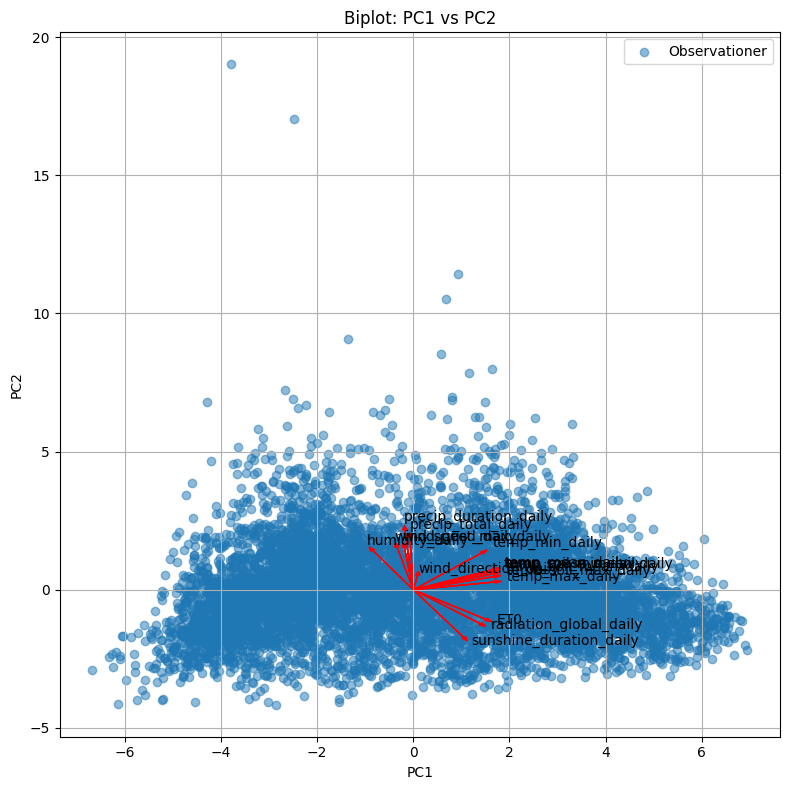

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1) Vælg features (alle variable undtagen KarupBro)
features = merged_df.drop(columns=['KarupBro'])

# 2) Standardisér data (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# 3) Kør PCA
pca = PCA()  # uden n_components får du alle
X_pca = pca.fit_transform(X_scaled)

# 4) Forklaret varians per komponent
explained_variance = pd.Series(
    pca.explained_variance_ratio_,
    index=[f'PC{i+1}' for i in range(len(features.columns))]
)
print("Forklaret variansandel pr. PC:")
print(explained_variance)

# 5) Scree‐plot
plt.figure(figsize=(8, 5))
explained_variance.plot(kind='bar')
plt.ylabel('Forklaret variansandel')
plt.title('Scree‐plot')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 6) Loadings (hvor meget hver originalvariabel bidrager til hver PC)
loadings = pd.DataFrame(
    pca.components_.T,
    index=features.columns,
    columns=explained_variance.index
)
print("\nLoadings (bidrag til PC’erne):")
print(loadings)

# 7) Biplot for PC1 vs. PC2
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, label='Observationer')
for var in features.columns:
    plt.arrow(0, 0,
              loadings.loc[var, 'PC1'] * 5,
              loadings.loc[var, 'PC2'] * 5,
              color='r', head_width=0.1)
    plt.text(loadings.loc[var, 'PC1'] * 5 * 1.15,
             loadings.loc[var, 'PC2'] * 5 * 1.15,
             var, color='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot: PC1 vs PC2')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

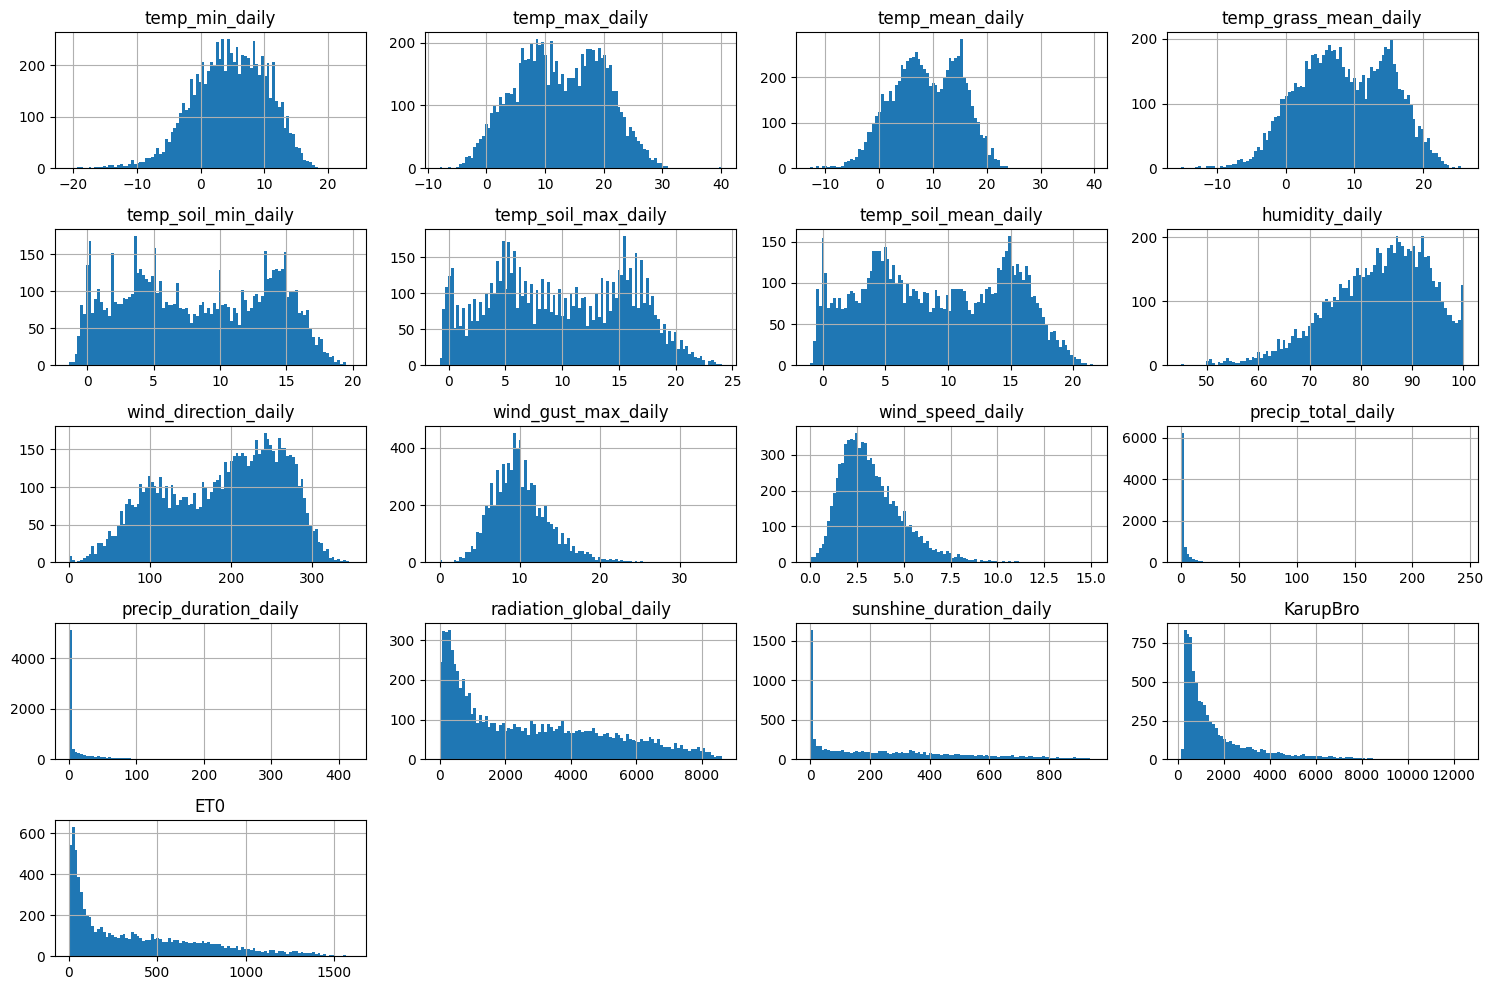

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
merged_df.hist(bins=100,figsize=(15, 10))
plt.tight_layout()
plt.show()


In [17]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# def filter_outliers_and_ffill(df, factor):
#     """
#     For each numeric column in the dataframe, this function:
#       1. Computes the IQR and sets values outside [Q1 - factor*IQR, Q3 + factor*IQR] to NaN.
#       2. Imputes missing values using forward fill.
#       3. Prints out the number of outliers overwritten for each column.
      
#     Parameters:
#         df (pd.DataFrame): The input dataframe.
#         factor (float): The multiplier for the IQR to determine outlier thresholds.
        
#     Returns:
#         pd.DataFrame: The dataframe with outliers filtered and imputed.
#     """
#     df_clean = df.copy()
#     numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
#     outlier_counts = {}

#     for col in numeric_cols:
#         Q1 = df_clean[col].quantile(0.25)
#         Q3 = df_clean[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - factor * IQR
#         upper_bound = Q3 + factor * IQR
        
#         # Create a boolean mask for outliers
#         is_outlier = (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)
#         count_outliers = is_outlier.sum()
#         outlier_counts[col] = count_outliers
        
#         # Set outliers to NaN
#         df_clean.loc[is_outlier, col] = np.nan
        
#         # Impute missing values using forward fill
#         df_clean[col] = df_clean[col].ffill()

#     # Print the outlier counts for each numeric column
#     print("Outlier counts overwritten per column:")
#     for col, count in outlier_counts.items():
#         print(f"{col}: {count}")
    
#     return df_clean

# # Apply the function to the merged dataset
# filter_outliers_and_ffill(merged_df, factor=20)

In [18]:
merged_df.to_csv("data_cleaned_and_interpolated.csv")